# MODELIN FINE-TUNE AŞAMASI

**BERT VE DISTILBERT MODELLERİ İÇİN KULLANILAN KÜTÜPHANELER VE MODÜLLER**

In [ ]:
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 46.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 70.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=550f1f0ed1ecea7e937d1332f0e91089177e850fdc0a14e9c16028522947d0d5
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=

In [ ]:
pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.1
    Uninstalling transformers-4.41.1:
      Successfully uninstalled transformers-4.41.1


In [ ]:
import ktrain
from ktrain import text

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

**FINE-TUNE DATASININ İMPORT EDİLMESİ**

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/new_dataset/text.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


**Data önhazırlık işlemleri**

In [ ]:
l = ["Unnamed: 0"]

In [ ]:
train_df.drop(l, axis =1, inplace= True)

In [ ]:
#datayı karıştırır.
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
#ilk 50 bin datanın alınması
train_df =train_df.head(50000)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
#DataFrame'i eğitim ve doğrulama (validation) setlerine ayırmak için
x_train, x_val, y_train, y_val = train_test_split(train_df['text'], train_df['label'], shuffle=True, test_size = 0.2, random_state=42, stratify=train_df['label'])

In [ ]:
#ktrain kütüphanenisinin text modülünü kullanarak bir metin sınıflandırma modeli oluşturur.DistilBERT modelini kullanarak metin verilerini sınıflandırmak için bir transformer modeli hazırlar.
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=128, class_names=[0,1,2,3,4,5])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
#pandas dataframe'lerini pandas numpy dizisine dönüştürür.
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
#ktrain kütüphanesinin text modülünü kullanarak metin verilerini eğitim ve doğrulama setlerine uygun şekilde ön işler.
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_val, y_val)

preprocessing train...
language: en
train sequence lengths:
	mean : 19
	95percentile : 41
	99percentile : 52


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 40
	99percentile : 52


In [ ]:
#ktrain kütüphanesinin text modülünü kullanarak bir sınıflandırma modeli oluşturur.
model = t.get_classifier()

In [ ]:
#ktrain kütüphanesini kullanarak bir learner nesnesi oluşturur. Bu nesne, eğitim sürecini yönetir ve modelin eğitim ve değerlendirme işlemlerini gerçekleştirir.
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

In [ ]:
#En uygun learning rate'i bulmak için kullanılır
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1250/1250 [==============================] - 505s 385ms/step - loss: 1.2626 - accuracy: 0.5106
Epoch 2/1024
1250/1250 [==============================] - 57s 38ms/step - loss: 31.7675 - accuracy: 0.3052


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


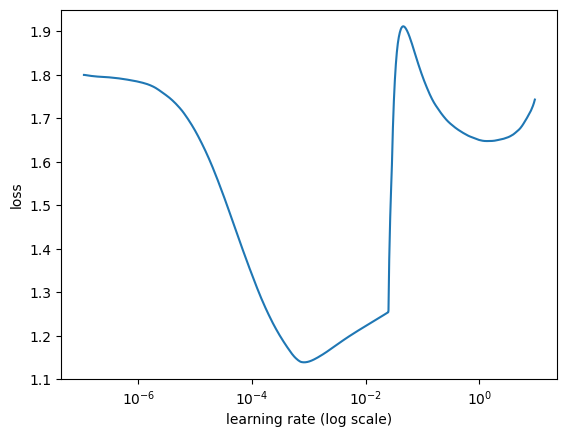

In [ ]:
learner.lr_plot()

In [ ]:
#Distilbert modelinin verilen data ile fine-tuning işlemini gerçekleştirir
#learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5


KeyboardInterrupt: 

In [ ]:
#Emotions Datasının kategorileri
train_names = [0,1,2,3,4,5]

In [ ]:
#Fine-tune edilmiş modeli Google Drive üzerine kaydeder.
#ktrain.get_predictor(model, t).save('/content/drive/MyDrive/Colab Notebooks/disitilbert_new_data_model')


# KAYDEDİLEN MODELİN YÜKLENMESİ

In [ ]:
#Google Drive üzerinden kaydedilmiş modeli yükler.
model = ktrain.load_predictor('/content/drive/MyDrive/Colab Notebooks/disitilbert_new_data_model')

In [ ]:
#Modelin tahmin işlemini gerçekleştirmesi için learner nesnesine yükler.
learner = ktrain.get_learner(model.model, train_data=trn, val_data=val, batch_size=32)

In [ ]:
#learner nesnesini kullanarak predictor oluşturur.
predictor = ktrain.get_predictor(learner.model, t)

In [ ]:
#klasların doğruluğunun kontrolünü sağlar.
predictor.get_classes()

[0, 1, 2, 3, 4, 5]

In [ ]:
#Modelin raporlarını gerçekleştirmek için belirtilen modül eklenir.
from sklearn.metrics import classification_report

In [ ]:
#Modelin sonuçlarını kontrol etmek için en başta belirlenen validation datası ile kontrolü sağlanır.
predictions = predictor.predict(x_val)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Sınıflandırma raporu
print(classification_report(y_val, predictions, target_names = ['0','1','2','3','4','5']))

# Accuracy hesaplama
accuracy = accuracy_score(y_val, predictions)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2896
           1       0.96      0.94      0.95      3391
           2       0.83      0.86      0.84       835
           3       0.96      0.94      0.95      1364
           4       0.86      0.96      0.90      1153
           5       0.90      0.69      0.78       361

    accuracy                           0.94     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.94      0.94      0.94     10000

Accuracy: 0.9376


# Eğitilmiş Model ile kategorilendirilmemiş datanın duygu analizi

In [ ]:
#Youtube üzerinden çekilen ve istenilen formatta temizlenen metin verisi
cleaned_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_data/cleaned_2sora_cleaned_2.csv")

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29784 entries, 0 to 29783
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    29784 non-null  object
dtypes: object(1)
memory usage: 232.8+ KB


In [ ]:
#Pandas Dataframe'ni istenilen tuple to tuple formatına dönüştüren fonksiyon
def pddf_to_list(text):
    text = str(text)
    return text

In [ ]:
cleaned_data = [pddf_to_list(text) for text in cleaned_data['text']]

In [ ]:
#Duygu analizinin yapılması
youtube_predictions = predictor.predict(cleaned_data)

In [ ]:
youtube_predictions

[1,
 3,
 3,
 1,
 1,
 1,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 1,
 1,
 4,
 4,
 4,
 0,
 1,
 1,
 4,
 0,
 3,
 1,
 0,
 5,
 3,
 1,
 0,
 1,
 0,
 4,
 0,
 0,
 3,
 0,
 1,
 0,
 3,
 0,
 3,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 4,
 1,
 0,
 1,
 3,
 3,
 3,
 4,
 0,
 0,
 4,
 1,
 3,
 3,
 1,
 0,
 1,
 5,
 1,
 0,
 3,
 0,
 1,
 0,
 0,
 4,
 1,
 1,
 1,
 0,
 4,
 1,
 0,
 1,
 1,
 1,
 3,
 0,
 1,
 0,
 0,
 1,
 5,
 0,
 1,
 0,
 0,
 1,
 1,
 4,
 4,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 4,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 0,
 3,
 1,
 1,
 3,
 3,
 0,
 0,
 0,
 1,
 3,
 3,
 4,
 3,
 1,
 0,
 1,
 3,
 4,
 0,
 4,
 3,
 1,
 4,
 1,
 1,
 0,
 3,
 3,
 0,
 1,
 1,
 3,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 4,
 1,
 1,
 1,
 4,
 1,
 3,
 4,
 0,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 5,
 0,
 4,
 0,
 1,
 3,
 3,
 4,
 1,
 3,
 3,
 1,
 1,
 4,
 0,
 0,
 4,
 3,
 1,
 1,
 0,
 4,
 1,
 0,
 0,
 3,
 4,
 4,
 4,
 3,
 0,
 0,
 4,
 5,
 0,
 1,
 0,
 4,
 1,
 4,
 0,
 4,
 1,
 1,
 1,
 3,
 4,
 1,
 4,
 4,
 5,
 1,
 3,
 3,
 3,
 1,
 0,


# Youtube verisi ile Predict sonuçlarının birleştirilip yeni bir csv dosyasına kaydedilmesi

In [ ]:
#Integer değer olarak girilen kategorileri anlamlandırır
label_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}


In [ ]:
youtube_predictions = [label_mapping[label] for label in youtube_predictions]

In [ ]:
youtube_predictions

['joy',
 'anger',
 'anger',
 'joy',
 'joy',
 'joy',
 'anger',
 'fear',
 'anger',
 'anger',
 'anger',
 'joy',
 'anger',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'fear',
 'fear',
 'sadness',
 'joy',
 'joy',
 'fear',
 'sadness',
 'anger',
 'joy',
 'sadness',
 'surprise',
 'anger',
 'joy',
 'sadness',
 'joy',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'anger',
 'sadness',
 'anger',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'joy',
 'sadness',
 'joy',
 'anger',
 'anger',
 'anger',
 'fear',
 'sadness',
 'sadness',
 'fear',
 'joy',
 'anger',
 'anger',
 'joy',
 'sadness',
 'joy',
 'surprise',
 'joy',
 'sadness',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'fear',
 'joy',
 'joy',
 'joy',
 'sadness',
 'fear',
 'joy',
 'sadness',
 'joy',
 'joy',
 'joy',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'surprise',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'fear

In [ ]:
len(youtube_predictions)

29784

In [ ]:
result_cleaned_data = pd.DataFrame(cleaned_data)


In [ ]:
result_cleaned_data.columns = ['text']

In [ ]:
result_predictions = pd.DataFrame(youtube_predictions)
result_predictions.columns = ['emotions']

In [ ]:
combined_df = pd.concat([result_cleaned_data, result_predictions], axis=1)
print(combined_df)

                                                    text emotions
0      let s with creativity one of the last enjoymen...      joy
1                 can we get a remake of the rock eating    anger
2                                       anyone here from    anger
3      first one to come up with a genuine biotic ver...      joy
4      i cant wait for this to be to the public it wi...      joy
...                                                  ...      ...
29779  as an aspiring and artist this is terrifying m...  sadness
29780  extraordinary for storyteller and original ide...      joy
29781  or people could look into something that was s...      joy
29782                            am buy this to generate    anger
29783  i can finally make my million fi blockbuster m...      joy

[29784 rows x 2 columns]


In [ ]:
combined_df.to_csv('/content/drive/MyDrive/Colab Notebooks/newData_predicted_data/newDATA_predictedResults.csv', index=False)

# Kategorilendirilmiş datanın Sonuç tabloları

In [ ]:
combined_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/newData_predicted_data/newDATA_predictedResults.csv')

In [ ]:
# Print the count of each category
category_counts = combined_df['emotions'].value_counts()
total_count = len(combined_df)

# Print the counts and percentages in the specified format
for label, count in category_counts.items():
    percentage = (count / total_count) * 100
    print(f"{label}: {count} ({percentage:.2f}%)")
    # Print the total number of data points

print(f"Total data points: {total_count}")

joy: 10243 (34.39%)
anger: 8114 (27.24%)
sadness: 6261 (21.02%)
fear: 4501 (15.11%)
surprise: 559 (1.88%)
love: 106 (0.36%)
Total data points: 29784


In [ ]:

category_counts = combined_df['emotions'].value_counts()
total_count = len(combined_df)

# Sayıları ve yüzdeleri belirtilen formatta yazdır
for label, count in category_counts.items():
    percentage = (count / total_count) * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

# Toplam veri noktalarının sayısını yazdır
print(f"Total data points: {total_count}")

# Sonuçları bir pilot tabloda göster
pilot_table = pd.DataFrame({
    'Category': category_counts.index,
    'Count': category_counts.values,
    'Percentage': (category_counts.values / total_count) * 100
})

print(pilot_table)


joy: 10243 (34.39%)
anger: 8114 (27.24%)
sadness: 6261 (21.02%)
fear: 4501 (15.11%)
surprise: 559 (1.88%)
love: 106 (0.36%)
Total data points: 29784
   Category  Count  Percentage
0       joy  10243   34.390948
1     anger   8114   27.242815
2   sadness   6261   21.021354
3      fear   4501   15.112141
4  surprise    559    1.876847
5      love    106    0.355896


In [ ]:

category_counts = combined_df['emotions'].value_counts()

# Sayımlar için bir DataFrame oluştur
data = {
    'Category': category_counts.index,
    'Count': category_counts.values
}

count_df = pd.DataFrame(data)

# Bar grafiği çiz
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Count', data=count_df, palette='viridis')
plt.title('Bar Chart of Emotion Category Counts')
plt.xlabel('Emotion Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


NameError: name 'plt' is not defined